In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터셋 불러오기

In [19]:
from google.colab import files
uploaded = files.upload()

import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))


Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
# train_data = pd.read_csv('/content/drive/MyDrive/AI개발/data/bike sharing demand/train.csv')
# train_data.info()

In [22]:
# test_data = pd.read_csv('/content/drive/MyDrive/AI개발/data/bike sharing demand/test.csv')
# test_data.info()

## 데이터 확인

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday (0: 일반일, 1: 행사일)
4. **workingday** - whether the day is neither a weekend nor holiday (1:출근하는 날,0: 출근 안하는 날(토,일)
5. **weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

In [23]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


결측치 없음

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 데이터 전처리 - datetime

In [26]:
train_data['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [27]:
# type: object-> datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

test_data['datetime'] = pd.to_datetime(test_data['datetime'])

In [28]:
# datetime 열에서 연, 월, 일, 시간 추출
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.month
train_data['day'] = train_data['datetime'].dt.day
train_data['hour'] = train_data['datetime'].dt.hour

In [29]:
test_data['year'] = test_data['datetime'].dt.year
test_data['month'] = test_data['datetime'].dt.month
test_data['day'] = test_data['datetime'].dt.day
test_data['hour'] = test_data['datetime'].dt.hour

In [30]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [31]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [32]:
# train_data에서 불필요한 열 삭제 (casual + registered = count)
train_data = train_data.drop(['casual', 'registered'],axis=1)

In [33]:
# train_data, test_data에서 'datetime'열 삭제 (year, month, day, hour로 추출 완료)
train_data = train_data.drop(['datetime'],axis=1)
test_data = test_data.drop(['datetime'],axis=1)

In [34]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## 상관관계 확인

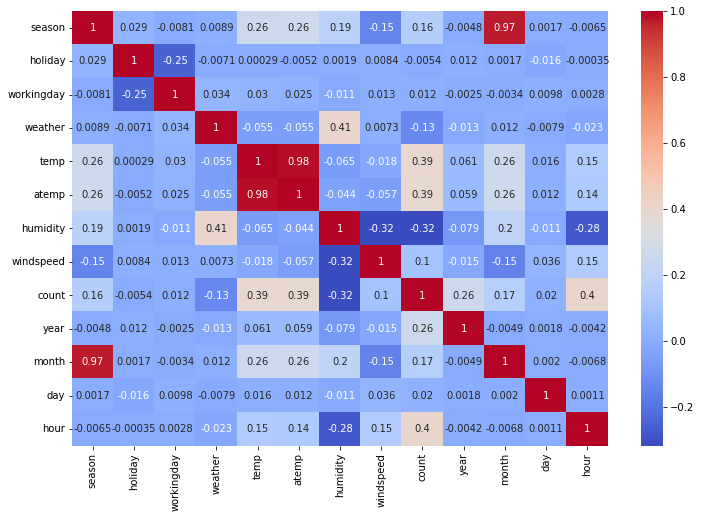

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

- temp, atemp, hour, humidity : 상관관계 높음
- season, weather, windspeed, year, month : 상관관계 조금 있음
- holiday, workingday, day : 상관관계 없음

**상관관계를 그래프로 시각화**

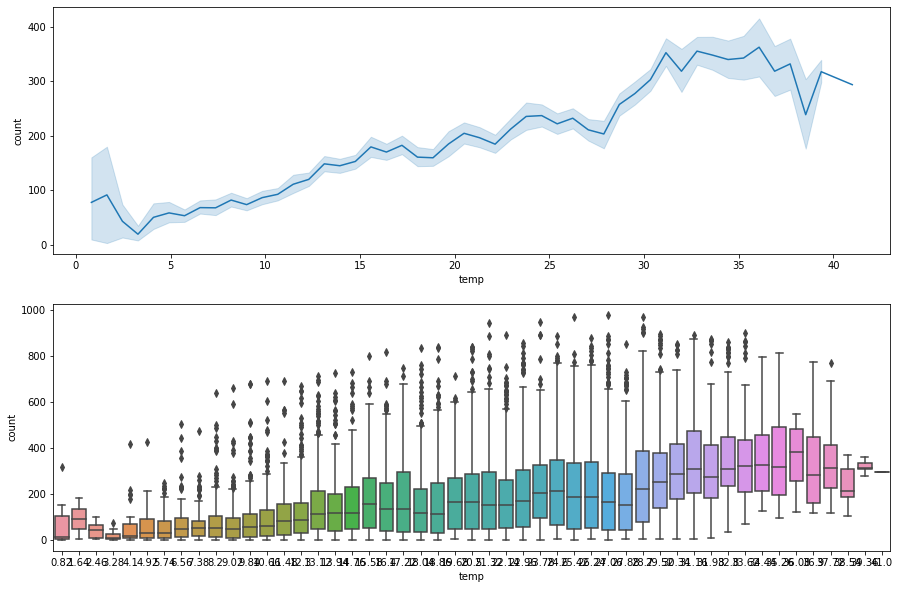

In [36]:
# temp와 count 상관관계 시각화
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.lineplot(data=train_data, x="temp", y="count")
plt.subplot(2, 1, 2)
sns.boxplot(data=train_data, x="temp", y="count")

한 변수 temp 안에 여러 가지 count 값 존재, 95% 신뢰구간을 bootstrapping으로 계산해서 하늘색 면적으로 표시

***temp : 10~35사이에서 count 값 높음***

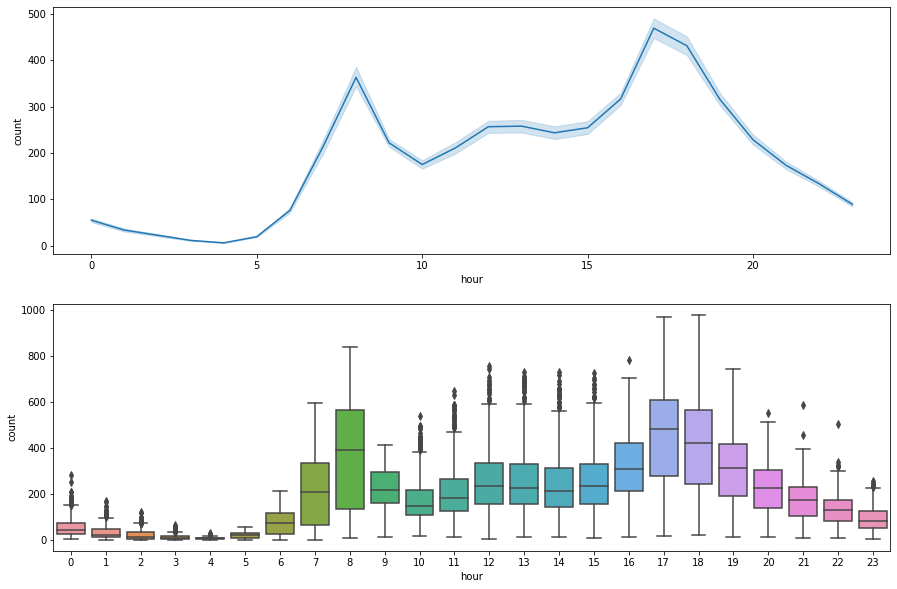

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.lineplot(data=train_data, x="hour", y="count")
plt.subplot(2, 1, 2)
sns.boxplot(data=train_data, x="hour", y="count")

***hour: 6\~10과 15\~20 에서 count 높음  -> 출,퇴근 시간***

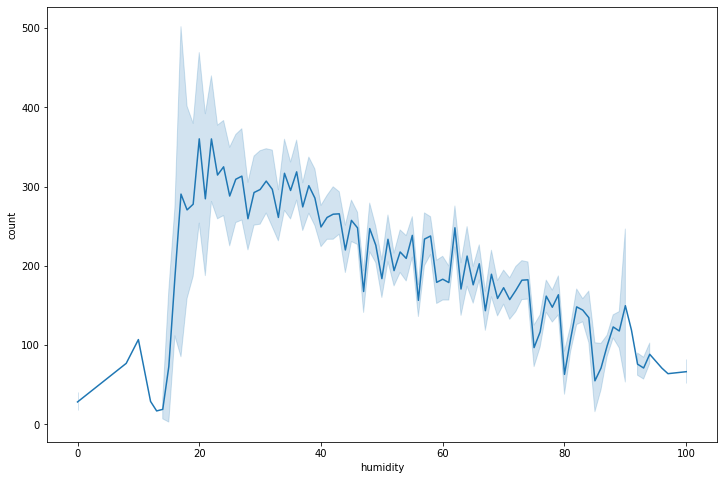

In [38]:
# humidity와 count 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=train_data, x="humidity", y="count")

***humidity=20~40에서 count 높음***

In [39]:
train_data[['atemp','temp']]

,atemp,temp
0,14.395,9.84
1,13.635,9.02
2,13.635,9.02
3,14.395,9.84
4,14.395,9.84
...,...,...
10881,19.695,15.58
10882,17.425,14.76
10883,15.910,13.94
10884,17.425,13.94


**이외의 상관관계가 낮은 데이터 그래프로 시각화**

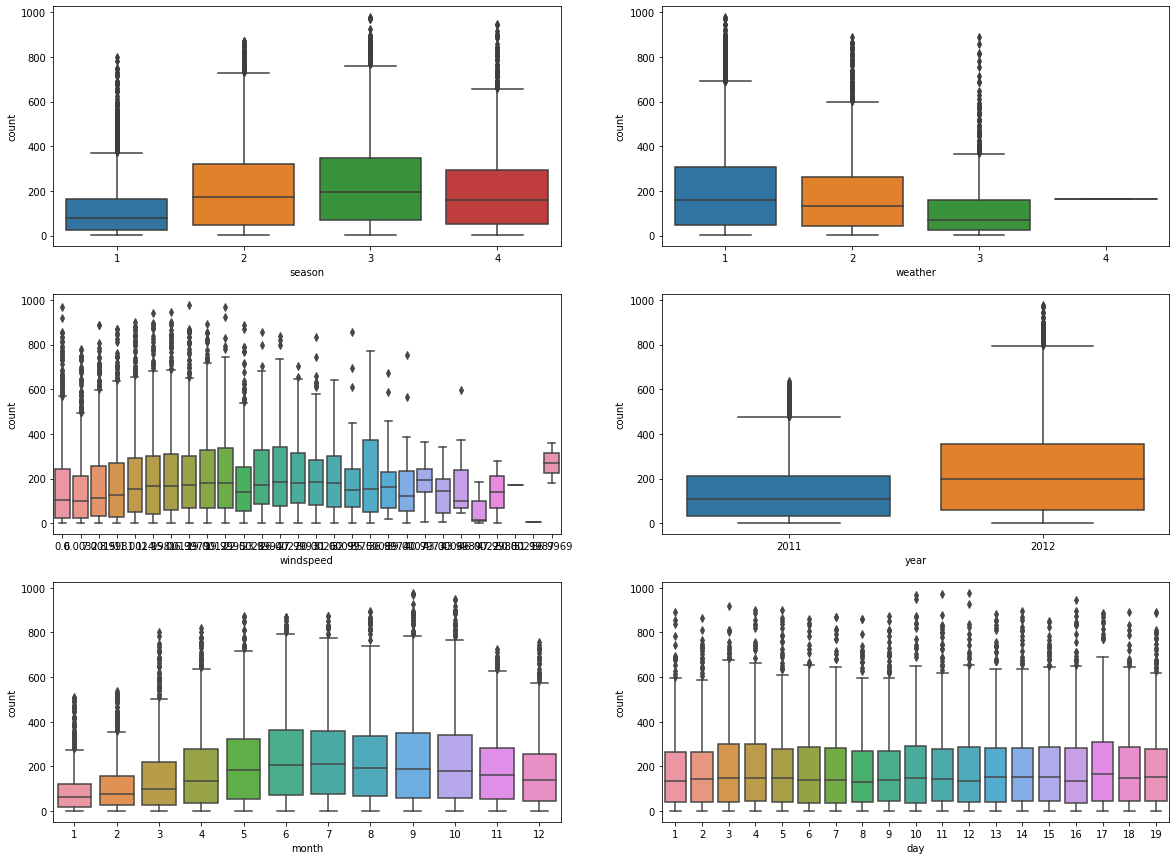

In [40]:
fig,axes = plt.subplots(3,2)
fig.set_size_inches(20,15)
sns.boxplot(x=train_data["season"], y=train_data["count"], ax=axes[0][0])

sns.boxplot(x=train_data["weather"], y=train_data["count"], ax=axes[0][1])

sns.boxplot(x=train_data["windspeed"], y=train_data["count"], ax=axes[1][0])

sns.boxplot(x=train_data["year"], y=train_data["count"], ax=axes[1][1])

sns.boxplot(x=train_data["month"], y=train_data["count"], ax=axes[2][0])

sns.boxplot(x=train_data["day"], y=train_data["count"], ax=axes[2][1])

**windspeed = 0 대체하기**

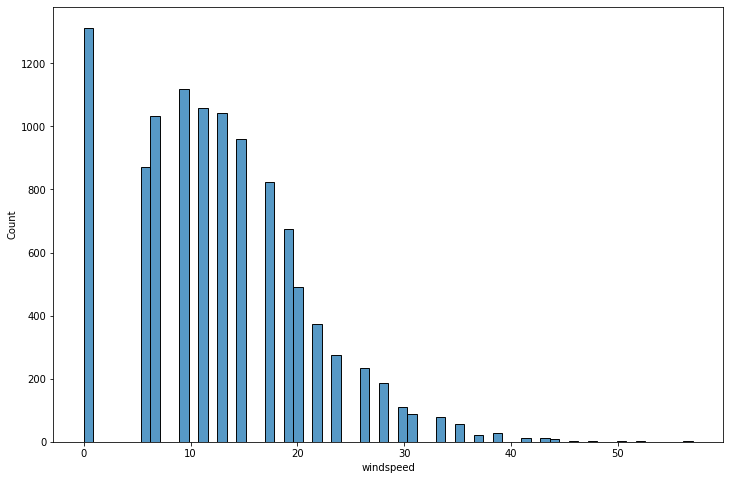

In [41]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data['windspeed'])

In [42]:
train_data['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [43]:
# 평균치 확인
train_data['windspeed'].mean()

12.799395406945093

In [45]:
# 아웃라이어(0) Nan값으로 바꾸기
cond = (train_data['windspeed'] == 0)
train_data.loc[cond, 'windspeed'] = np.nan

In [46]:
# 방법1. 결측치를 뒤의 값으로 채우기
train_data['windspeed'] = train_data['windspeed'].interpolate().bfill()

# 평균 확인
train_data['windspeed'].mean()

13.827650918611562

In [ ]:
# 방법2. 결측치를 뒤의 값으로 채우기
# train_data['windspeed'] = train_data['windspeed'].interpolate().ffill()

# 평균 확인
# train_data['windspeed'].mean()

In [ ]:
# 방법3. 결측치를 평균값으로 채우기
# train_data['windspeed'].fillna(train_data['windspeed'].mean())

# 평균 확인
# train_data['windspeed'].mean()

방법 1을 사용했을 때 평균이 이전과 가장 비슷함

In [47]:
# 대체 여부 확인하기
train_data['windspeed'].value_counts()

8.998100     1156
7.001500     1146
11.001400    1071
12.998000    1047
6.003200     1040
             ... 
10.637773       1
6.275464        1
6.547727        1
6.819991        1
7.751900        1
Name: windspeed, Length: 294, dtype: int64

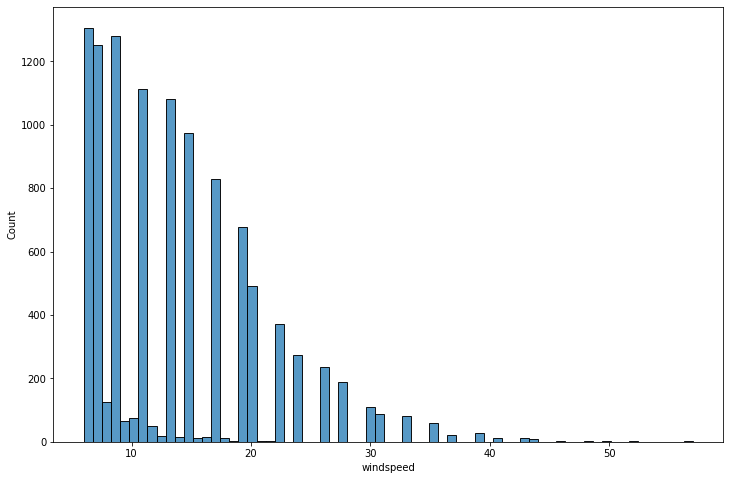

In [48]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data['windspeed'])

In [49]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,6.0032,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,6.0032,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,6.0032,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,6.0032,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,6.0032,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


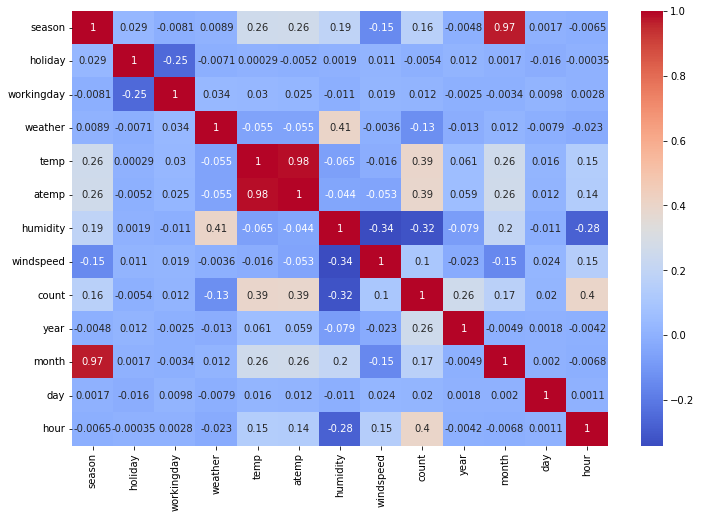

In [57]:
# 상관관계 다시 확인
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

**windspeed와 count 사이 상관계수 변함없음**

In [50]:
features = [
    'season', 
    #'holiday', 
    #'workingday', 
    'weather', 
    'temp',
    'atemp', 
    'humidity', 
    'windspeed', 
    'year', 
    'month', 
    #'day',
    'hour'
]

## train/test set 분할

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# 상관관계 없는 데이터 drop
x_features= train_data[features]
y_target = train_data['count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


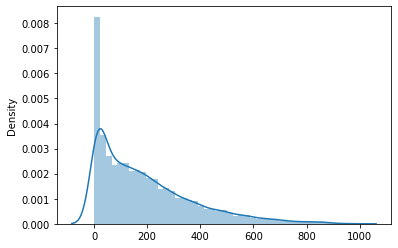

In [53]:
sns.distplot([y_target])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


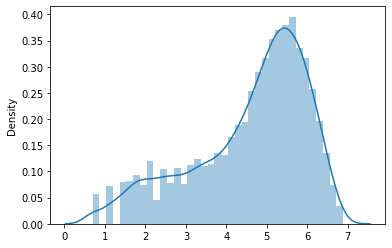

In [ ]:
# y_target 정규분포 형태로 만들어 왜도 없애기
y_log = np.log1p(y_target)
sns.distplot([y_log])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_log, random_state=42, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape

((8164, 9), (2722, 9))

In [ ]:
x_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,month,hour
2930,3,1,28.70,32.575,65,12.9980,2011,7,0
7669,2,1,22.96,26.515,52,22.0028,2012,5,22
1346,2,1,12.30,15.910,61,6.0032,2011,4,23
9432,3,1,23.78,27.275,60,8.9981,2012,9,9
453,1,3,8.20,9.850,93,12.9980,2011,2,23


In [ ]:
x_train.reset_index(inplace=True, drop=True)
x_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,month,hour
0,3,1,28.70,32.575,65,12.9980,2011,7,0
1,2,1,22.96,26.515,52,22.0028,2012,5,22
2,2,1,12.30,15.910,61,6.0032,2011,4,23
3,3,1,23.78,27.275,60,8.9981,2012,9,9
4,1,3,8.20,9.850,93,12.9980,2011,2,23


In [ ]:
x_test.reset_index(inplace=True, drop=True)
x_test.head()

,season,weather,temp,atemp,humidity,windspeed,year,month,hour
0,3,1,33.62,40.150,59,8.5023,2011,7,11
1,1,1,4.10,6.820,54,6.0032,2012,1,6
2,4,1,9.84,11.365,48,12.9980,2011,12,18
3,3,2,29.52,34.090,62,12.9980,2012,8,10
4,2,1,25.42,31.060,53,16.9979,2012,6,23


In [ ]:
y_train.reset_index(inplace=True, drop=True)
y_train.head()

0    3.583519
1    5.529429
2    3.988984
3    5.693732
4    2.833213
Name: count, dtype: float64

In [ ]:
y_test.reset_index(inplace=True, drop=True)
y_test.head()

0    4.852030
1    2.639057
2    5.099866
3    5.455321
4    5.407172
Name: count, dtype: float64

## 성능 평가 지표

In [ ]:
from sklearn.metrics import mean_absolute_error

## 예측 모델 테스트

**1. 단일 회귀**

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 모델 생성
linear_reg = LinearRegression(n_jobs=-1)

In [ ]:
# 모델 학습
linear_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
linear_reg.coef_, linear_reg.intercept_

(array([-4.20217802e-02, -1.03909938e-02, -2.41189381e-05,  4.08734445e-02,
        -1.49164538e-02,  4.09025636e-03,  4.33222817e-01,  7.50896657e-02,
         9.89244472e-02]), -868.4524762133565)

In [ ]:
lin_pred = linear_reg.predict(x_test)

In [ ]:
# 성능평가
lin=mean_absolute_error(lin_pred, y_test)
print(lin)

0.8112544422110332


 2. Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)

In [ ]:
rid_pred = ridge.predict(x_test)

In [ ]:
# 성능평가
rid = mean_absolute_error(rid_pred, y_test)
print(rid)

0.8112535614285618


3. Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)

In [ ]:
las_pred = lasso.predict(x_test)

In [ ]:
# 성능평가
las = mean_absolute_error(las_pred, y_test)
print(las)

0.8113044550424192


4. ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet = ElasticNet(alpha=0.03, l1_ratio=0.9)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)

In [ ]:
el_pred = elasticnet.predict(x_test)

In [ ]:
# 성능평가
el = mean_absolute_error(el_pred, y_test)
print(el)

0.8122399951983974


5. poly pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.03, l1_ratio=0.9)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

In [ ]:
poly_pred = poly_pipeline.predict(x_test)

In [ ]:
# 성능평가
poly = mean_absolute_error(poly_pred, y_test)
print(poly)

0.7051680456639274


In [ ]:
poly_pipeline2 = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.03, l1_ratio=0.9)
)
poly_pred = poly_pipeline2.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.990e+00, tolerance: 1.649e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
poly2_pred = poly_pipeline2.predict(x_test)

In [ ]:
# 성능평가
poly2 = mean_absolute_error(poly2_pred, y_test)
print(poly2)

0.6553825125631876


**2. Voting Regression**

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [ ]:
single_models = [
    ('linear_reg', linear_reg), 
    ('poly_pipeline', poly_pipeline),
    ('poly_pipeline2', poly_pipeline2),
]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)
voting_regressor.fit(x_train, y_train)
voting_pred = voting_regressor.predict(x_test)

In [ ]:
# 성능평가
voting = mean_absolute_error(voting_pred, y_test)
print(voting)

0.7128147216850017


**3. Random Forest(Bagging Ensemble)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=200)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

In [ ]:
# 성능평가
RFr = mean_absolute_error(rfr_pred, y_test)
print(RFr)

0.410560220838317


**4. GridSearch를 이용한 parameter tuning**

In [ ]:
params = {
    'n_estimators':[100, 150, 200, 250]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

#scoring = 'neg_mean_absolute_error' :일반적으로 scoring을 값이 클 수록 모델 성능이 좋은 것으로 사이킷런에서 인식하는데, mae는 값이 클 수록 모델 성능이 저하되는 것이므로 Negative 키워드를 붙여서 사용

0.8337832768813966
{'n_estimators': 150}


In [ ]:
rfr_tuning = RandomForestRegressor(random_state=42, n_estimators=150)
rfr_tuning.fit(x_train, y_train)
rfr_tuning_pred = rfr_tuning.predict(x_test)

In [ ]:
# 성능평가
rfr_t = mean_absolute_error(rfr_tuning_pred, y_test)
print(rfr_t)

0.4112358633715028


parameter tuning 결과 이전 random forest 모델과 동일

**5. Gradient Boost (Boosting Ensemble)**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)

In [ ]:
# 성능평가
gbr = mean_absolute_error(gbr_pred, y_test)
print(gbr)

0.4259432934045205


## 모델 별 성능 평가

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Mean Absolute Error')]

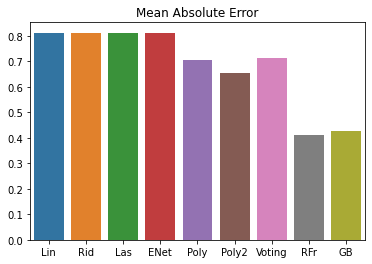

In [ ]:
x=['Lin', 'Rid','Las', 'ENet', 'Poly','Poly2','Voting','RFr','GB']
y=[lin,rid,las,el,poly,poly2,voting,RFr,gbr]

sns.barplot(x,y)
sns.barplot(x,y).set(title='Mean Absolute Error')

## 모델 학습과 예측

MAE가 가장 낮은 RandomForestRegressor 모델로 결정

In [ ]:
model = RandomForestRegressor(random_state=0)

In [ ]:
model.fit(x_features, y_log)

RandomForestRegressor(random_state=0)

In [ ]:
prediction = model.predict(test_data[features])
prediction = np.expm1(prediction)

In [ ]:
prediction

array([ 18.25819928,  16.65668229,  11.66035002, ..., 126.60172815,
       120.22837205,  65.60293885])